The following example shows you how to display the difference between two observations of each groups in a horizontal lollipop plot using the `hlines()` and the `scatter()` functions. This example was taken from https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/184-lollipop-plot-with-2-groups.ipynb


In [342]:
# libraries
import json 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {}
test_data = {}
modes = ["", ""]

def plot_data(suite, baseline, contender, test_label):
    modes[0] = baseline
    modes[1] = contender
    test_data[0] = []
    test_data[1] = []
    for mode in modes:
        data[mode] = []
        
    for mode in modes:
        fname = f"./results/arrow_full_benchmark_{mode}_N0.json"
        #fname = f"./results/arrow_ExecuteScalarExpressionOverhead_{mode}_N0.json"
        #fname = f"./results/arrow_ParallelMemoryCopy_{mode}_N0.json"
        print (f"Reading filename:", fname)
        with open(fname) as f:
            fdata = json.load(f)
            data_unit = fdata["suites"][suite]["benchmarks"][0]["unit"]
            benchmark_name = fdata["suites"][suite]["name"]
            benchmark_suite_name = benchmark_name + "(" + str(suite) + ") => "
            
            for benchmark in fdata["suites"][suite]["benchmarks"]:
                data[mode].append (benchmark["values"][0])
                # Save the name of the test w/o the benchmark suite name
                if mode == modes[0]:
                    test_name = benchmark["name"]
                    test_data[0].append(test_name)
        
    
    # Create the test_data 
    for i in range(0, len(data[modes[0]])):
        if data[modes[0]][i] != 0:
            test_data[1].append( float((data[modes[1]][i] - data[modes[0]][i]) / data[modes[0]][i]) *100.0)
    
    # Create a dataframe
    # test_data[0] contains test names and test_data[1] contains comparison values
    df = pd.DataFrame({'Tests title':test_data[0], 'baseline':0 , 'contender':test_data[1] })
     
    # Reorder it following the values of the first value:
    ordered_df = df.sort_values(by='contender')
    my_range=range(1,len(ordered_df.index)+1)
     
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=ordered_df['baseline'], xmax=ordered_df['contender'], color='grey', alpha=0.4)
    plt.scatter(ordered_df['baseline'], my_range, color='skyblue', alpha=1, label=modes[0])
    plt.scatter(ordered_df['contender'], my_range, color='green', alpha=0.4 , label=modes[1])
    plt.legend()
    
    #plt.xscale('log')
    
    # Add title and axis names
    print (f"For the", benchmark_suite_name, "tests are measuring: ", data_unit)
    plt.yticks(my_range, ordered_df['Tests title'], size=8)
    plt.title(f"Memory response {test_label}", loc='left')
    plt.xlabel('Regression (%)')
    plt.ylabel(benchmark_name)
    
    # Show the graph
    plt.show()

Reading filename: ./results/arrow_full_benchmark_m0_N0.json
Reading filename: ./results/arrow_full_benchmark_m1_N0.json
For the arrow-io-memory-benchmark(1) =>  tests are measuring:  bytes_per_second


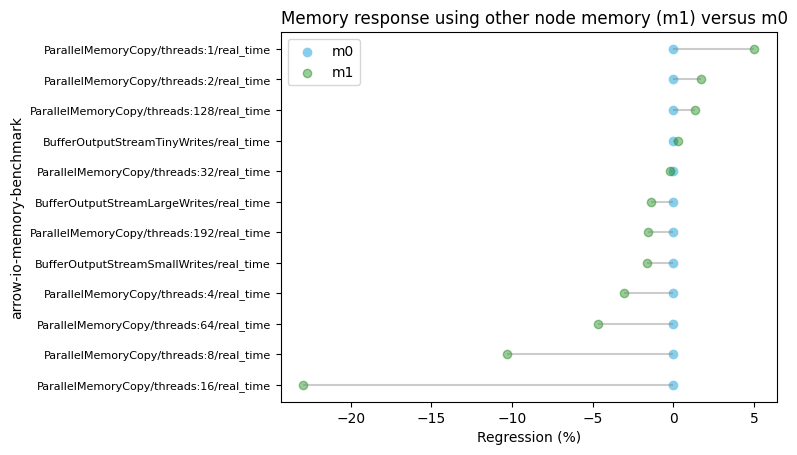

Reading filename: ./results/arrow_full_benchmark_m0_N0.json
Reading filename: ./results/arrow_full_benchmark_m2_N0.json
For the arrow-io-memory-benchmark(1) =>  tests are measuring:  bytes_per_second


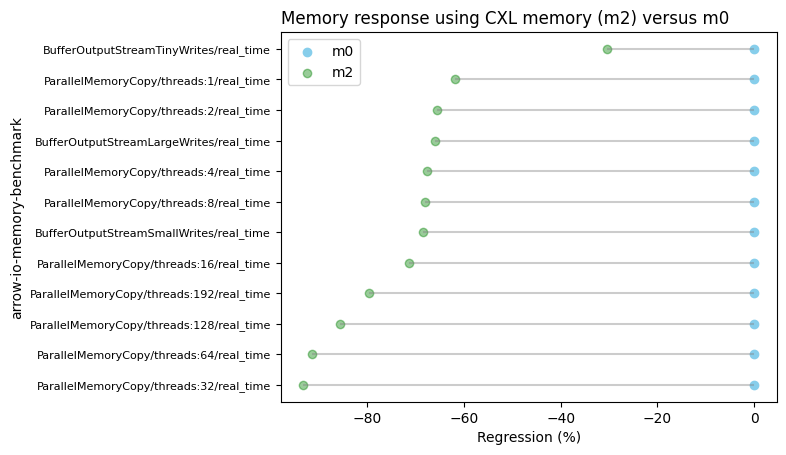

Reading filename: ./results/arrow_full_benchmark_m1_N0.json
Reading filename: ./results/arrow_full_benchmark_m2_N0.json
For the arrow-io-memory-benchmark(1) =>  tests are measuring:  bytes_per_second


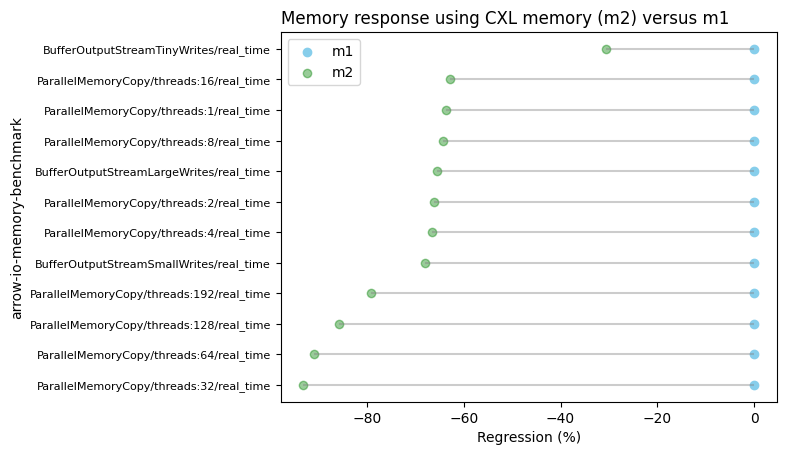

In [345]:
# Comparing data with program running on CPU node 0 and loacl memory (m0), other node memory (m1) or CXL memory (m2)
# Set 'range ( 1, 2)' to display the "arrow-io-memory-benchmark" which is a quick but efficient parallel memcopy benchmark
# Set 'range (21,22)' to display the "arrow-acero-expression-benchmark" which is a high memory usage benchmark
# Set 'range ( 0,59)' to display all benchmarks
for x in range(1,2):
    plot_data(x, "m0", "m1", "using other node memory (m1) versus m0")
    plot_data(x, "m0", "m2", "using CXL memory (m2) versus m0")
    plot_data(x, "m1", "m2", "using CXL memory (m2) versus m1")